<div style="text-align: center; padding: 20px; border-radius: 15px; background-color: #ba3a46; color: #333333; border: 2px solid #111823; font-family: Arial, sans-serif;">
  <h1 style="font-size: 2.5em; font-weight: bold; margin: 10px 0; color: #fff;">Valorant: Machine Learning & Analysis- V2</h1>
</div>

---

# 🎯 About Dataset

## 1. Introduction  
Valorant is a competitive multiplayer first-person shooter (FPS) where two teams of five players compete to be the first to win 13 rounds in a game. The ranked mode is where the most competitive players strive to achieve the highest rank possible.  

There are 9 ranked divisions in Valorant, listed in increasing order of player skill:  
Iron → Bronze → Silver → Gold → Platinum → Diamond → Ascendant → Immortal → Radiant  

This dataset captures the first 1000 ranked games of my Valorant journey, starting from Silver (around the 50th percentile of all players) and reaching Ascendant (around the 5th percentile).  

## 2. Game-Specific Clarifications  

#### 🔺 Ranked System  
- Each rank is divided into three tiers (e.g., Silver 1, Silver 2, Silver 3).  
- Players start at tier 1 and must progress through tiers before ranking up to the next division (e.g., Silver → Gold).  

#### 🔺 Agents  
- Agents are the playable characters in Valorant.  
- Not all agents appear in this dataset, as I primarily focus on two to four agents.  

#### 🔺 Maps  
- Each match takes place on a unique map, which impacts gameplay strategies.  

#### 🔺 Damage & Health  
- Damage represents the amount of health points removed from an enemy.  
- Health can start at 100, 125, or 150 but cannot exceed 150 or drop below 0 (death).  
- Damage Delta is the difference between damage given and received.  


#### 🔺 Combat Score & Frags  
- Combat Score (ACS) is calculated based on:  
  - Damage dealt  
  - Assists  
  - Multi-kills  
- Frags refer to eliminations (kills).  
  - Top Frag = Most kills on the team.  
  - Bottom Frag = Least kills on the team.  

This dataset tracks my individual combat performance across all ranked matches. 📊

---

# ✏️ Edit Log - V2

🔺 Implemented for loops to streamline the plotting of Countplots, Histplots, and Barplots across multiple features instead of using separate blocks.  

🔺 Compared XGBoost, Random Forest, and CatBoost using a for loop for efficiency.  

🔺 Performed hyperparameter tuning and k-fold cross-validation for better model performance.  

🔺 Previously, Random Forest had the best accuracy at 78%, but after optimization, CatBoost achieved 85% accuracy.  

🔺 Attempted dimensionality reduction using LDA, but it did not provide significant improvements. Hence didn't include the same in the project scope.  

## 1. Installations

In [1]:
#Lets Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Some Necessary Upgrades & Installations
!pip install --upgrade seaborn
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.


## 2. Import Librabries

In [3]:
#Importing Necessary Librabries for Data Preprocessing & Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_csv("/kaggle/input/my-first-1000-valorant-games/valorant_games.csv")

In [5]:
df.head() #Check the Data

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Placement,4/11/2023,Cypher,Ascent,Loss,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,Placement,4/12/2023,Cypher,Icebox,Loss,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,Placement,4/15/2023,KAY/O,Lotus,Win,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,Placement,4/15/2023,Brimstone,Ascent,Loss,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,Placement,4/15/2023,Cypher,Haven,Loss,1,13,6,14,3,0.4,-75,7,90,146,4


In [6]:
df.describe() #Understand Data

,game_id,episode,act,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,7.500000,2.066000,10.589000,10.52700,15.299000,14.249000,4.656000,1.178400,10.308000,22.763000,134.446000,205.382000,2.990000
std,288.819436,1.102368,0.868561,3.359966,3.55273,5.253113,3.724362,2.656072,0.656784,43.383791,9.919033,35.199916,56.539958,1.368127
min,1.000000,6.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.200000,-124.000000,2.000000,42.000000,59.000000,1.000000
25%,250.750000,7.000000,1.000000,8.000000,8.00000,12.000000,13.000000,3.000000,0.800000,-20.000000,15.000000,110.000000,166.000000,2.000000
50%,500.500000,7.000000,2.000000,13.000000,13.00000,15.000000,15.000000,4.000000,1.100000,9.000000,22.000000,133.000000,203.000000,3.000000
75%,750.250000,9.000000,3.000000,13.000000,13.00000,19.000000,17.000000,6.000000,1.400000,39.000000,29.000000,157.000000,240.000000,4.000000
max,1000.000000,9.000000,3.000000,18.000000,20.00000,35.000000,26.000000,20.000000,9.700000,293.000000,63.000000,373.000000,572.000000,5.000000


In [7]:
df.info() #Understand Data Type & Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        1000 non-null   int64  
 1   episode        1000 non-null   int64  
 2   act            1000 non-null   int64  
 3   rank           1000 non-null   object 
 4   date           1000 non-null   object 
 5   agent          1000 non-null   object 
 6   map            1000 non-null   object 
 7   outcome        1000 non-null   object 
 8   round_wins     1000 non-null   int64  
 9   round_losses   1000 non-null   int64  
 10  kills          1000 non-null   int64  
 11  deaths         1000 non-null   int64  
 12  assists        1000 non-null   int64  
 13  kdr            1000 non-null   float64
 14  avg_dmg_delta  1000 non-null   int64  
 15  headshot_pct   1000 non-null   int64  
 16  avg_dmg        1000 non-null   int64  
 17  acs            1000 non-null   int64  
 18  num_frag 

<div style="padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">
Our data has no missing values, hence we don't need to use methods like SimpleImputer to deal with the same.
</div>

In [8]:
df.isnull().sum() #Check Null Values

game_id          0
episode          0
act              0
rank             0
date             0
agent            0
map              0
outcome          0
round_wins       0
round_losses     0
kills            0
deaths           0
assists          0
kdr              0
avg_dmg_delta    0
headshot_pct     0
avg_dmg          0
acs              0
num_frag         0
dtype: int64

In [9]:
df.columns #Check All Columns

Index(['game_id', 'episode', 'act', 'rank', 'date', 'agent', 'map', 'outcome',
       'round_wins', 'round_losses', 'kills', 'deaths', 'assists', 'kdr',
       'avg_dmg_delta', 'headshot_pct', 'avg_dmg', 'acs', 'num_frag'],
      dtype='object')

In [10]:
#Convert date column to Datetime
df['date'] = pd.to_datetime(df['date'])

## 3. Data Visualization

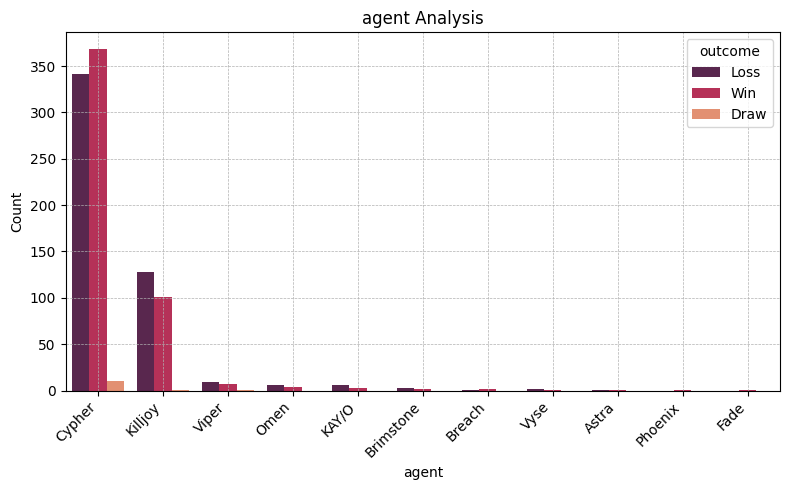

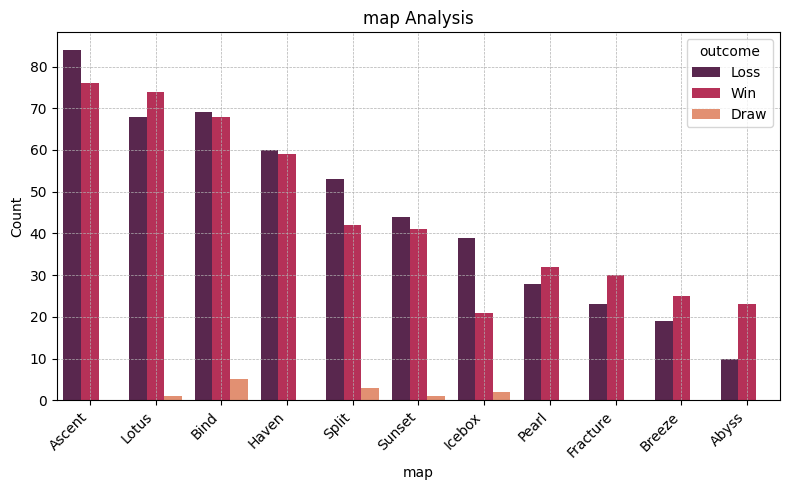

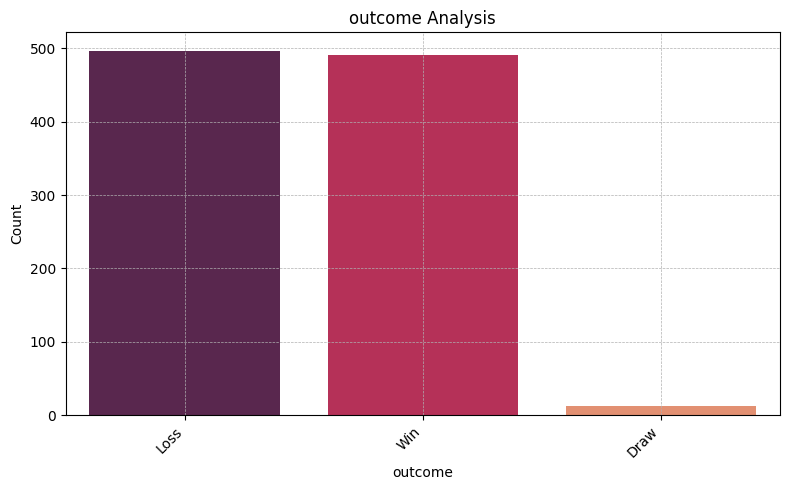

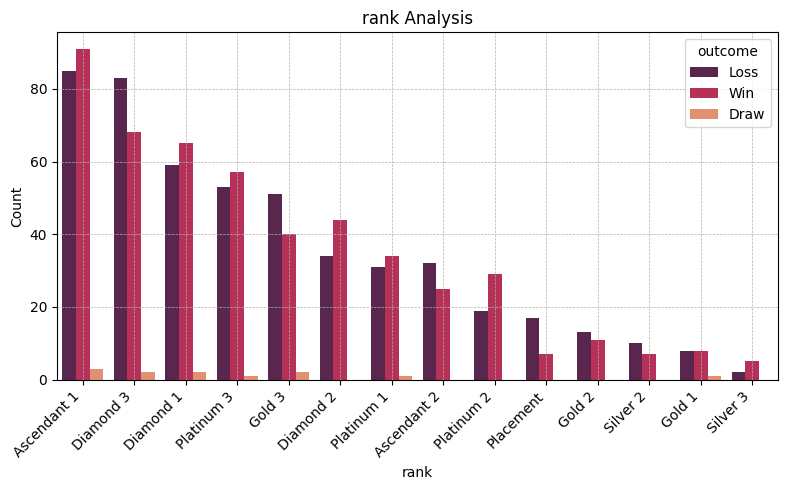

In [11]:
cat_cols = ['agent','map','outcome','rank']
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df,x=col,hue='outcome',palette='rocket',order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Analysis')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.show()
    print("\n")

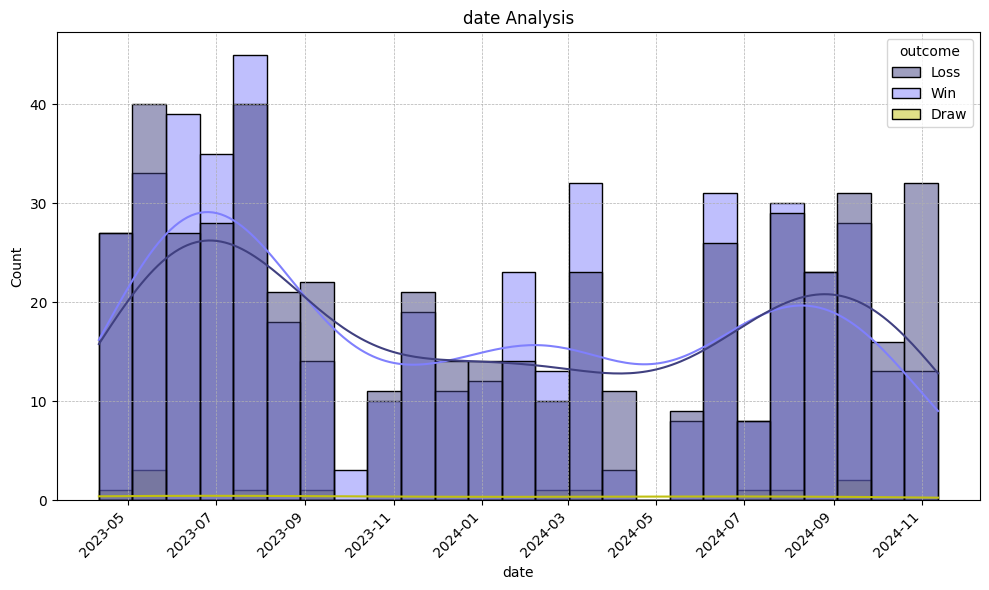

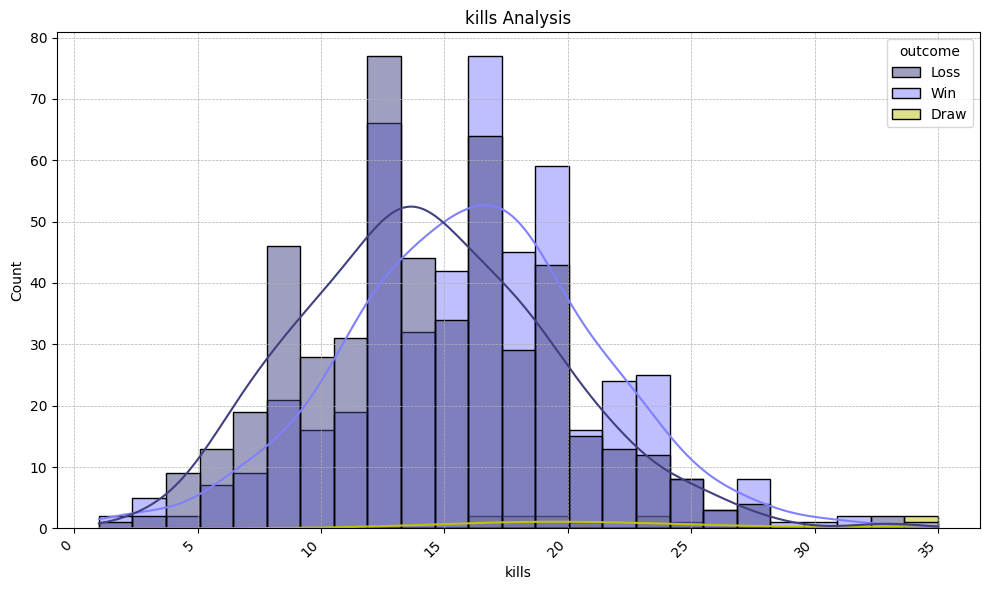

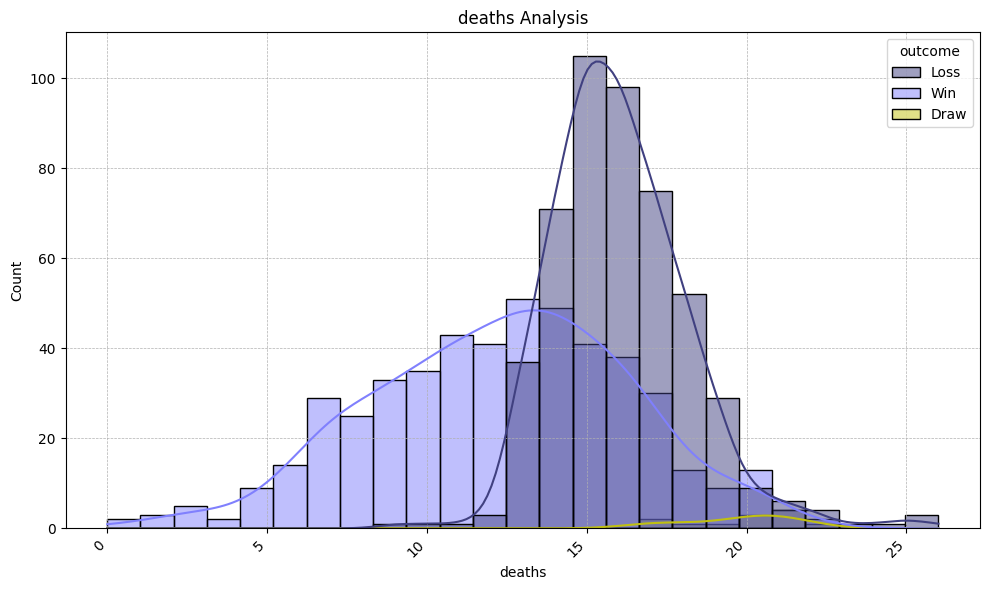

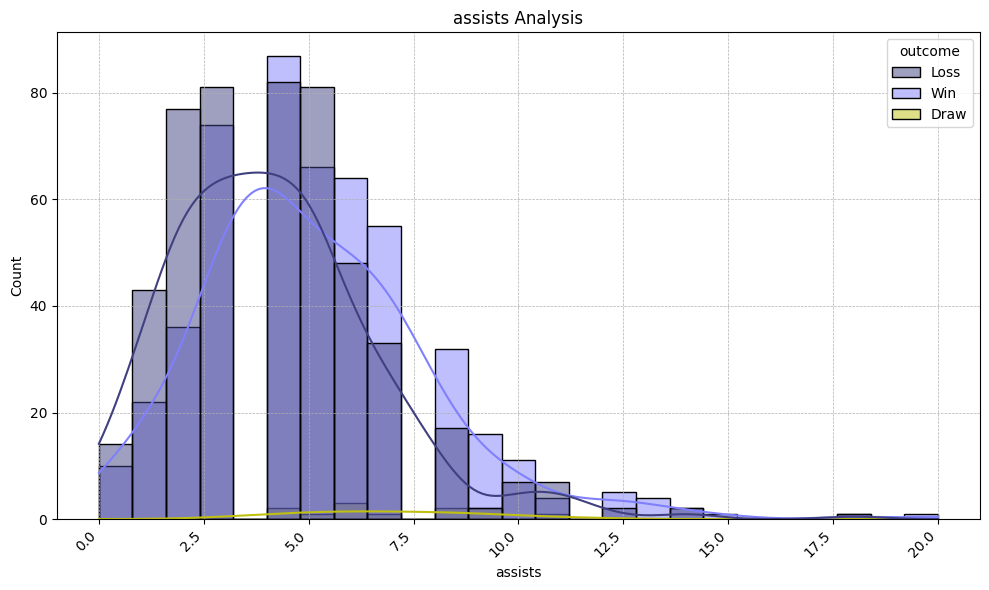

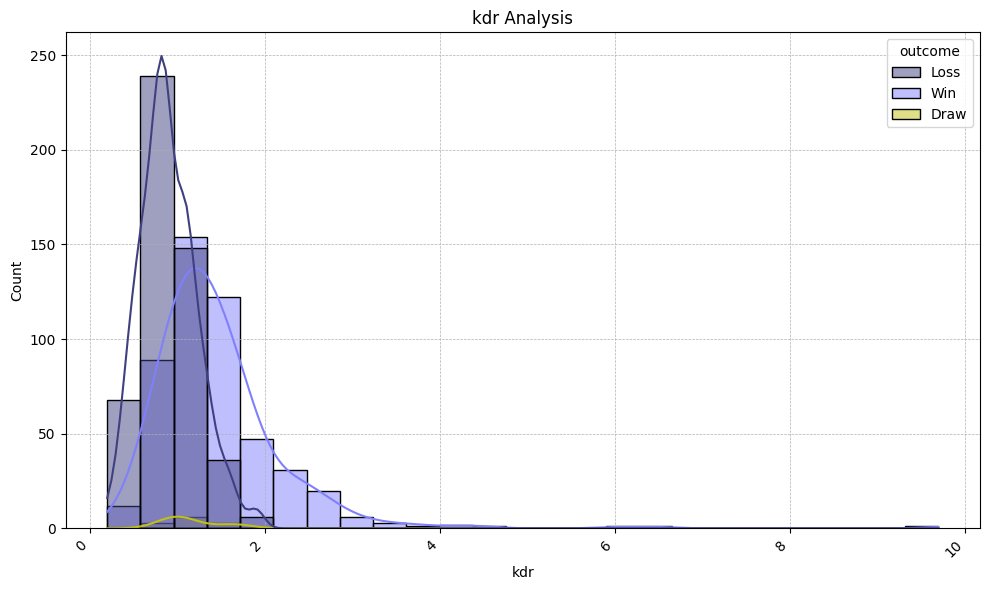

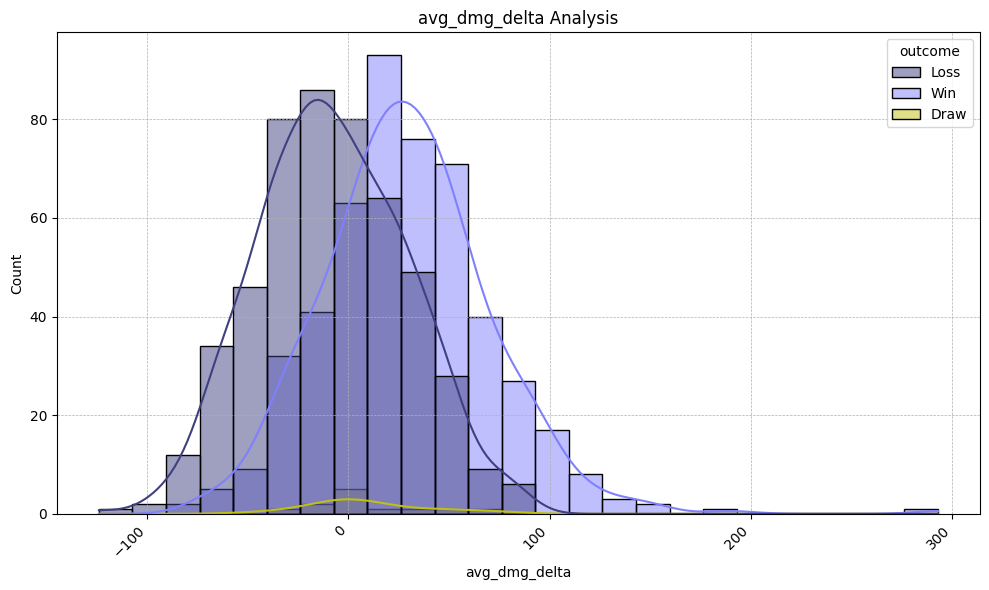

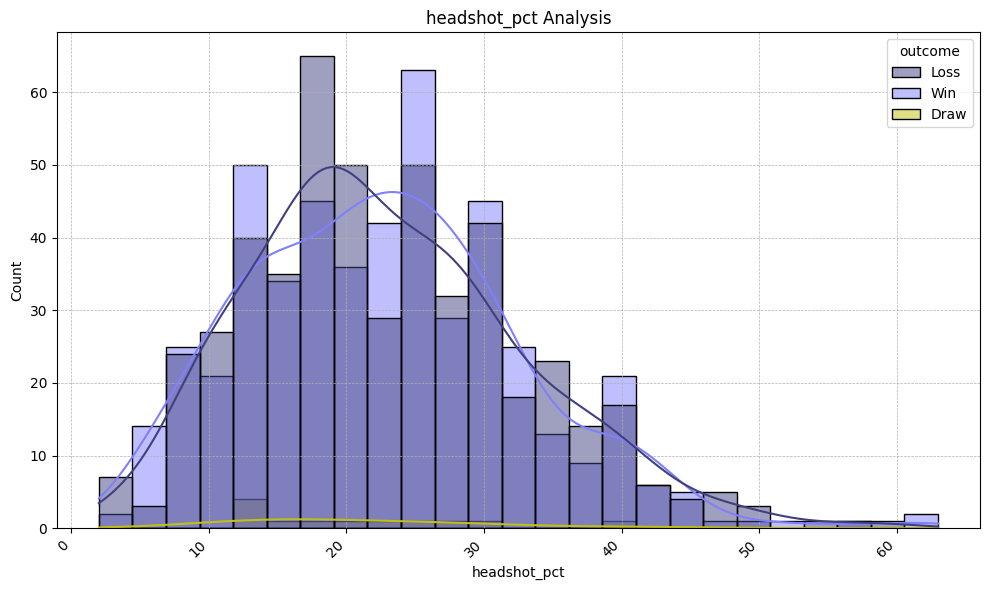

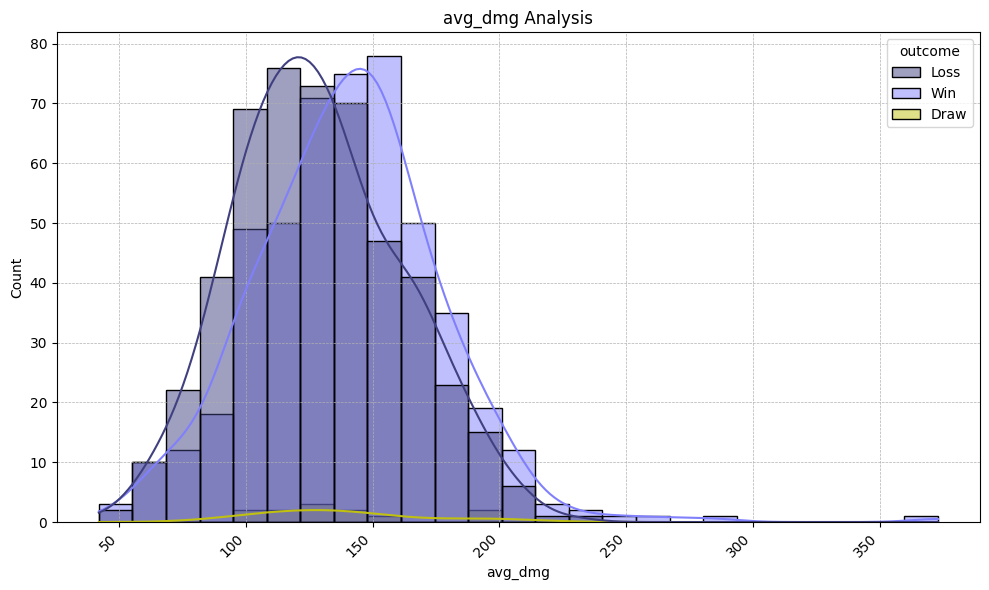

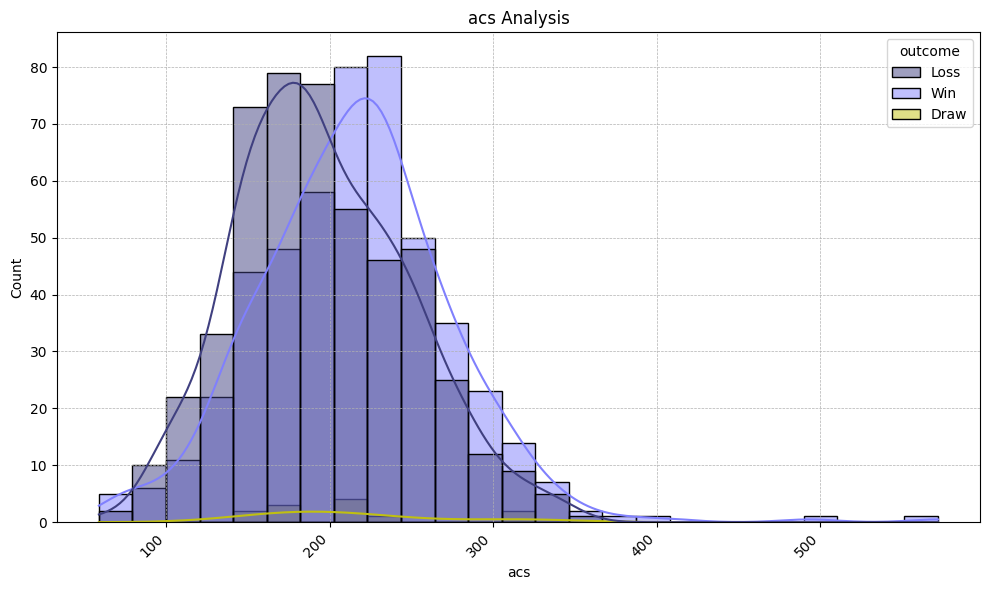

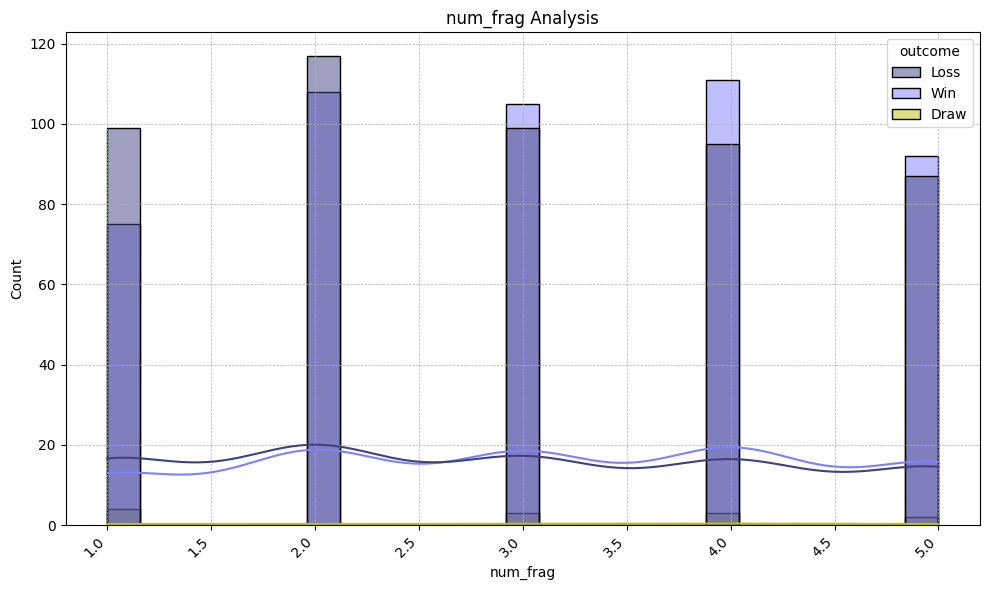

In [12]:
num_cols = ['date','kills','deaths','assists','kdr','avg_dmg_delta','headshot_pct','avg_dmg','acs','num_frag']
for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df,x=col,hue='outcome',palette='gist_stern',kde=True,bins=25)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Analysis')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.show()
    print("\n")

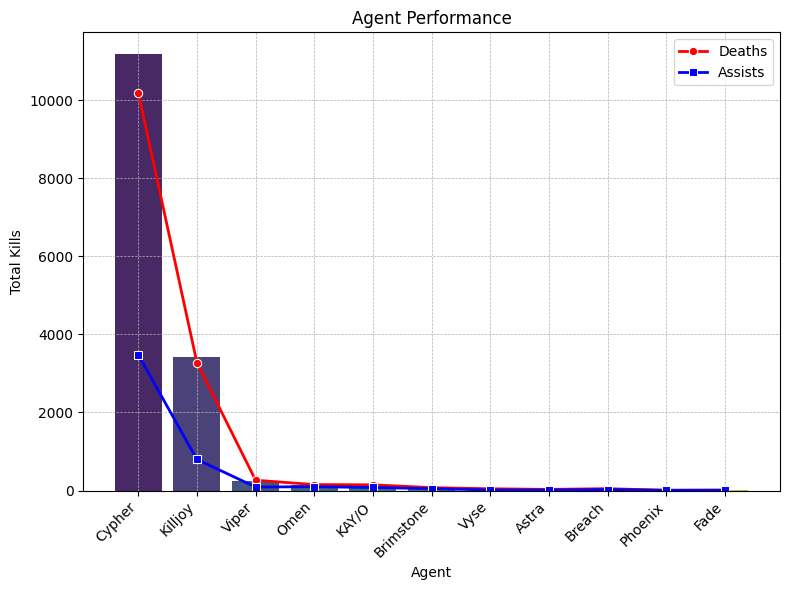

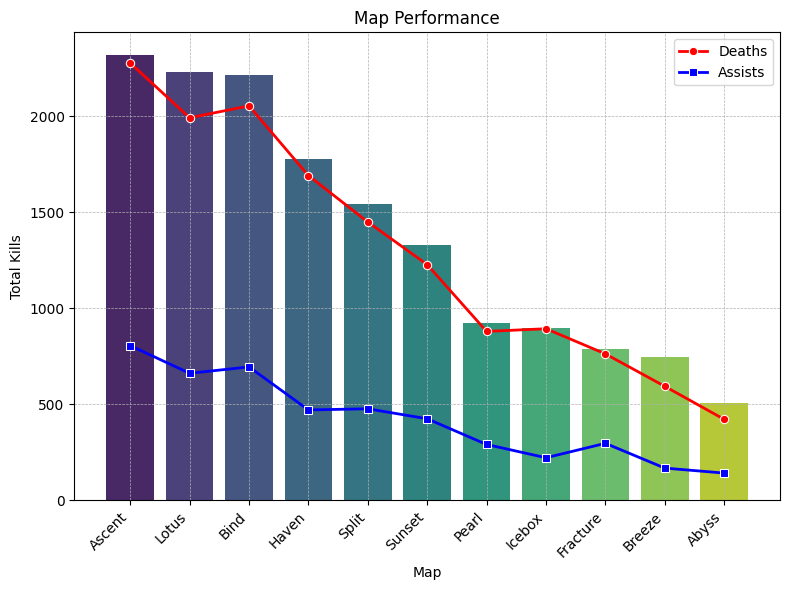

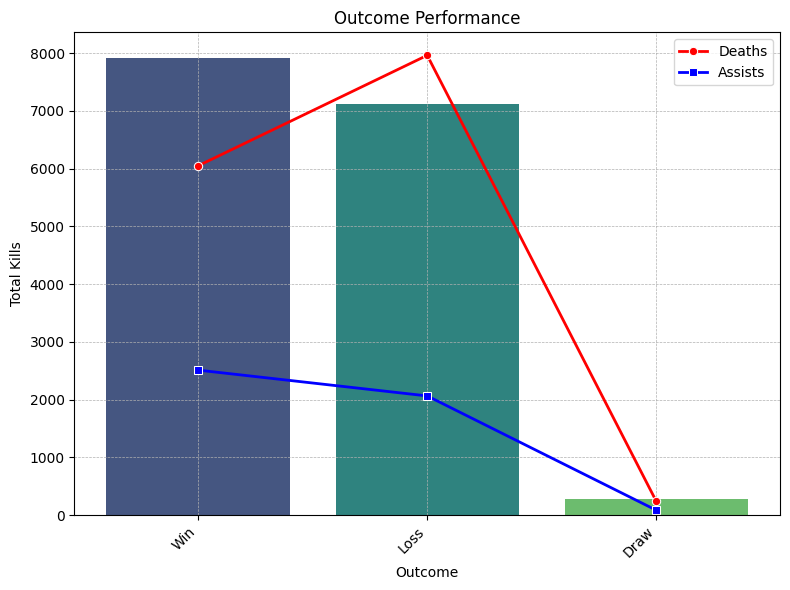

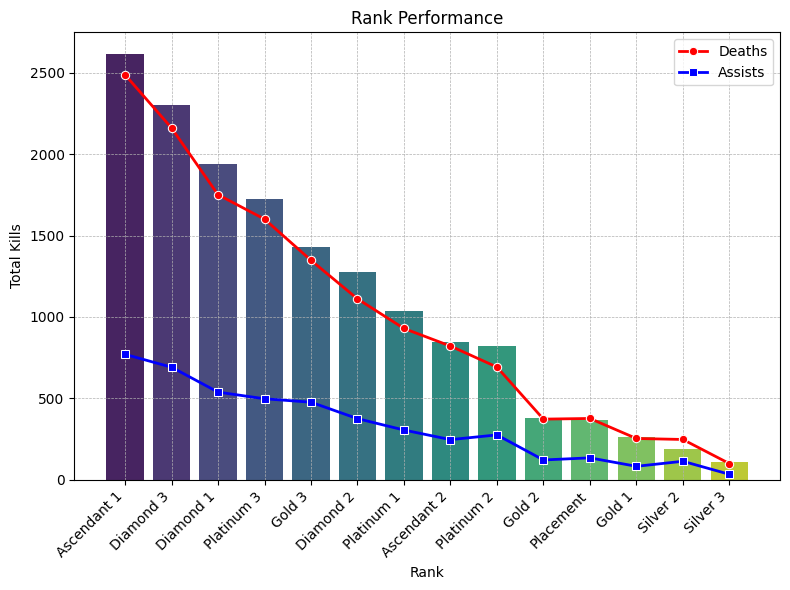

In [13]:
for col in cat_cols:
  data = df.groupby([col])[['kills','deaths','assists']].sum()
  data = data.reset_index()
  data = data.sort_values(by='kills', ascending=False)

  plt.figure(figsize=(8, 6))

  sns.barplot(x=col, y='kills', data=data,hue=col,palette='viridis')
  sns.lineplot(x=col, y='deaths', data=data,color='red',marker='o',label='Deaths',linewidth='2')
  sns.lineplot(x=col, y='assists', data=data,marker='s',color='blue',label='Assists',linewidth='2')

  plt.xlabel(col.capitalize())  # Dynamically set label
  plt.ylabel('Total Kills')
  plt.title(f'{col.capitalize()} Performance')
  plt.xticks(rotation=45, ha='right')  # Improve readability
  plt.tight_layout()
  plt.grid(linestyle = '--', linewidth = 0.5)
  plt.show()
  print("\n")

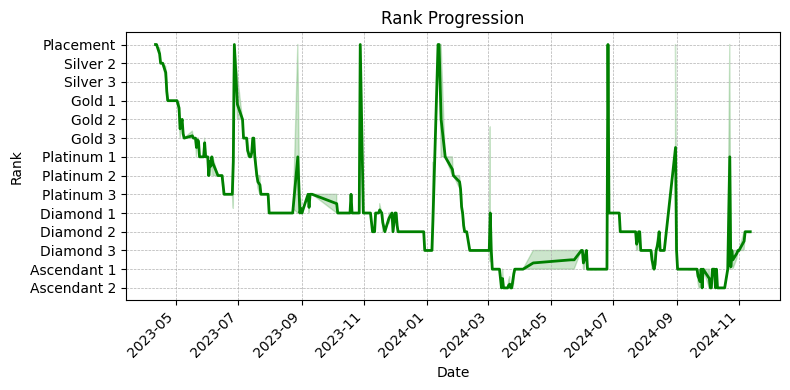

In [14]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df,x='date',y='rank',color='green',linewidth='2')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.title('Rank Progression')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

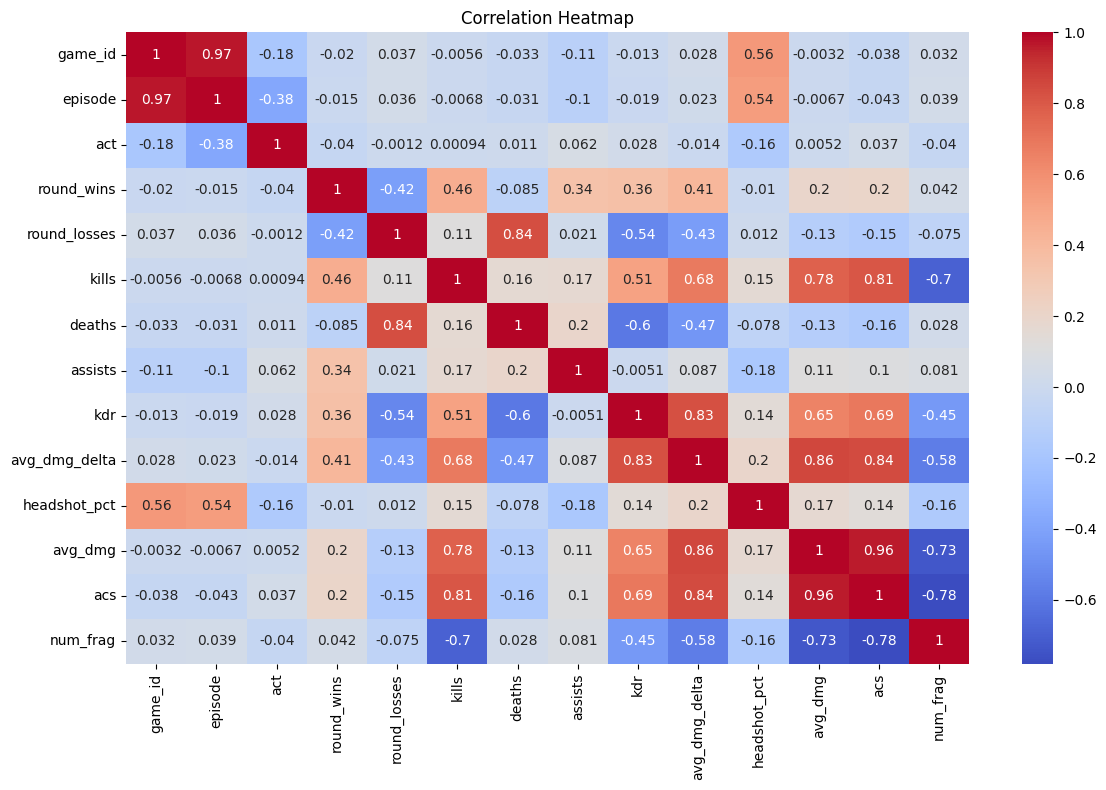

In [15]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 4. Machine Learning

### Feature Loading

In [16]:
#Identify Features
X = df[['rank','agent','map','kills','deaths','assists','kdr','avg_dmg_delta','headshot_pct','avg_dmg','acs','num_frag']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           1000 non-null   object 
 1   agent          1000 non-null   object 
 2   map            1000 non-null   object 
 3   kills          1000 non-null   int64  
 4   deaths         1000 non-null   int64  
 5   assists        1000 non-null   int64  
 6   kdr            1000 non-null   float64
 7   avg_dmg_delta  1000 non-null   int64  
 8   headshot_pct   1000 non-null   int64  
 9   avg_dmg        1000 non-null   int64  
 10  acs            1000 non-null   int64  
 11  num_frag       1000 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 93.9+ KB


### Label Loading

In [17]:
#Identify Label
y=df['outcome']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: outcome
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [18]:
X

,rank,agent,map,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,Placement,Cypher,Ascent,8,15,4,0.5,-61,3,76,125,3
1,Placement,Cypher,Icebox,3,15,2,0.2,-124,22,42,59,5
2,Placement,KAY/O,Lotus,7,12,7,0.6,-46,2,87,132,5
3,Placement,Brimstone,Ascent,18,12,10,1.5,23,14,137,230,2
4,Placement,Cypher,Haven,6,14,3,0.4,-75,7,90,146,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Diamond 2,Astra,Pearl,17,13,8,1.3,30,19,133,212,4
996,Diamond 2,Omen,Ascent,27,14,11,1.9,41,28,176,299,1
997,Diamond 2,Astra,Pearl,12,16,5,0.8,0,47,143,194,2
998,Diamond 2,Omen,Split,18,13,8,1.4,26,31,134,214,5


### Encoding Categorical Features

In [19]:
#Import Necessary Libraries for Data Enocoding, Machine Learning & Reports
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
categorical_columns = ['rank', 'agent', 'map'] #Categorical Data

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = ct.fit_transform(X)

In [21]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11960 stored elements and shape (1000, 45)>
  Coords	Values
  (0, 8)	1.0
  (0, 17)	1.0
  (0, 26)	1.0
  (0, 36)	8.0
  (0, 37)	15.0
  (0, 38)	4.0
  (0, 39)	0.5
  (0, 40)	-61.0
  (0, 41)	3.0
  (0, 42)	76.0
  (0, 43)	125.0
  (0, 44)	3.0
  (1, 8)	1.0
  (1, 17)	1.0
  (1, 31)	1.0
  (1, 36)	3.0
  (1, 37)	15.0
  (1, 38)	2.0
  (1, 39)	0.2
  (1, 40)	-124.0
  (1, 41)	22.0
  (1, 42)	42.0
  (1, 43)	59.0
  (1, 44)	5.0
  (2, 8)	1.0
  :	:
  (997, 44)	2.0
  (998, 3)	1.0
  (998, 21)	1.0
  (998, 34)	1.0
  (998, 36)	18.0
  (998, 37)	13.0
  (998, 38)	8.0
  (998, 39)	1.4
  (998, 40)	26.0
  (998, 41)	31.0
  (998, 42)	134.0
  (998, 43)	214.0
  (998, 44)	5.0
  (999, 3)	1.0
  (999, 23)	1.0
  (999, 27)	1.0
  (999, 36)	8.0
  (999, 37)	17.0
  (999, 38)	4.0
  (999, 39)	0.5
  (999, 40)	-71.0
  (999, 41)	18.0
  (999, 42)	87.0
  (999, 43)	130.0
  (999, 44)	4.0


### Encoding Label

In [22]:
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
print(y)

[1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 2 1 2 2 2 2 2 2 0 2 1 1 1 2 1 2 1 1 2
 1 1 1 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 1 2 2 1 2 1 2 2 1 2 2 1
 2 1 0 1 2 1 1 1 2 1 1 1 1 1 2 1 2 2 0 2 2 1 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2
 2 2 1 1 2 1 2 1 2 1 1 1 1 2 2 2 0 2 1 2 1 2 1 1 1 2 2 1 2 1 1 2 2 2 1 2 2
 1 2 2 2 2 1 1 2 1 1 1 1 1 1 2 2 2 2 1 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 1 2
 1 2 2 2 2 2 2 2 2 1 1 1 2 1 1 2 2 1 1 2 2 2 1 2 2 1 2 2 1 1 1 2 2 2 1 1 2
 2 2 1 1 2 2 1 2 1 1 1 2 2 2 2 1 1 2 1 2 2 1 2 1 1 1 1 2 2 2 1 2 1 2 2 2 1
 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 2 1 2 2 2 2 1 2 2 1 1 2 2 2 1 2 1 2 1 2
 2 1 2 2 2 1 1 2 2 1 1 0 2 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 2 2 1 2 1 2 1 1 2
 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 2 1 2 2 2 1 2 1 1 2 1 1 1 2 2 1 2 2 1 2 2
 1 1 1 1 1 1 2 1 1 1 2 2 2 2 1 1 2 1 2 1 1 1 2 2 1 1 1 2 2 1 2 0 2 1 1 1 1
 1 2 1 1 2 1 1 2 1 2 2 1 1 2 1 2 2 2 1 1 1 2 1 2 2 1 2 1 2 2 1 2 2 1 1 1 2
 2 1 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 1 2 2 2 1 1 1 1 1 2 1
 2 2 1 2 2 1 1 1 1 2 2 2 

### Split Training & Test Data

In [24]:
from sklearn.model_selection import train_test_split
# Split Data (Ensuring Consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ML Model Implementation

In [25]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Define Models with Random States
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_seed=42),
}

# Train and Evaluate Models
results = {}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  results[name] = {"Accuracy": accuracy}

# Print Results
for model, metrics in results.items():
    print(f"{model}: Accuracy = {metrics['Accuracy']:.4f}")

Random Forest: Accuracy = 0.7850
XGBoost: Accuracy = 0.7800
CatBoost: Accuracy = 0.8100


### Hyperparameter Tuning - Catboost

In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for CatBoost
param_grid = {
    'iterations': [100, 500, 800],
    'learning_rate': [0.01, 0.05,0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

# Perform Random Search
random_search = RandomizedSearchCV(
    estimator=CatBoostClassifier(verbose=0, random_seed=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of random samples
    scoring='accuracy',
    cv=5,  # Cross-validation
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Get best parameters
best_parameters = random_search.best_params_

# Train CatBoost with best parameters
best_catboost = CatBoostClassifier(**best_parameters, verbose=0, random_seed=42)
best_catboost.fit(X_train, y_train)

# Predict on test set
y_pred = best_catboost.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Test Accuracy: {:.4f}".format(test_accuracy))
print("Best Parameters:", best_parameters)


Test Accuracy: 0.8500
Best Parameters: {'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 10, 'border_count': 128}


### Final Classification Report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       0.81      0.92      0.86        99
           2       0.90      0.81      0.85        98

    accuracy                           0.85       200
   macro avg       0.90      0.58      0.57       200
weighted avg       0.86      0.85      0.84       200



---
## 📊 Summary : Key Findings 

🔺 Valorant ranked matches were analyzed using 1000 game records, focusing on ranking progression, combat performance, and game-specific features.  

🔺 Model comparison was conducted using Random Forest, XGBoost, and CatBoost to determine the best-performing algorithm.  

🔺 CatBoost outperformed other models, achieving the highest test accuracy of **85%**.  

🔺 Hyperparameter tuning and k-fold cross-validation significantly improved model accuracy.  

🔺 The classification report indicates:  
   - Class **0** has high precision (1.00) but very low recall (0.00) due to an extremely small sample size (support = 3). We can improve this by increasing sample size of data. 
   - Class **1** (majority class) has good recall (0.92) and f1-score (0.86), meaning the model identifies most instances correctly.  
   - Class **2** also performs well with 0.90 precision and 0.85 f1-score, suggesting balanced prediction capability.  

🔺 The macro average recall (0.58) is lower than accuracy (0.85), indicating an imbalance in recall across classes, likely due to class 0's low recall.  

🔺 Weighted averages reflect overall model performance, with precision (0.86), recall (0.85), and f1-score (0.84) confirming the model's reliability.  

🔺 Dimensionality reduction using LDA was explored but did not yield substantial benefits.  

---

## 🏆 Conclusion    

🔺 CatBoost demonstrated the highest accuracy and is the most suitable model for this dataset.  

🔺 Hyperparameter tuning played a crucial role in enhancing performance, highlighting the importance of fine-tuning machine learning models.  

🔺 Dimensionality reduction methods like LDA may not always be beneficial, and their effectiveness depends on the dataset and feature distribution. (Removed from code)

🔺 Using for loops for visualization and model comparisons increased efficiency and improved code readability.  

🔺 Future improvements could include testing additional models, feature engineering, and exploring alternative dimensionality reduction techniques.

---

## 🚀 Feature Scaling & Deep Learning Experiment  

I have performed feature scaling and deep learning separately in a Google Colab notebook. However, the results did not show a significant improvement nor outperformed CatBoost's accuracy (85%).  

If you found this Kaggle notebook useful, [please take a look at my Google Colab notebook here](https://colab.research.google.com/drive/1R0DIntvZbgL8Xoc2IVgtw9AzSsO-5oJy?usp=sharing).  

I would love to hear your suggestions on improving the model performance! 

<div style="background-color: #fff8ff; padding: 20px; border-radius: 10px; border: 1px solid #444555; font-family: Arial, sans-serif; color: #333333;">

  <h3 style="color: #444555; font-weight: bold;">If you found this notebook helpful, consider giving it an upvote! 👍</h3>
  <p style="font-size: 1.1em; color: #555555;">Your support encourages continued work in this domain. Feel free to leave your thoughts, feedback, or suggestions in the comments section. Let’s collaborate to make data science impactful!</p>

</div>